**Objective**

To implement a neural network that predicts the Ph of water given its hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes and turbidity using sklearn.

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

**Data Exploration**

In [2]:
# read the data
df = pd.read_csv("D:\ProjectData\water_potability.csv")

# check data frame shape
df.shape

(3276, 10)

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.drop(["Potability"],1,inplace = True)

In [6]:
df.shape

(3276, 9)

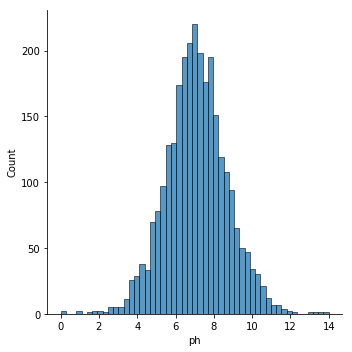

In [7]:
# check distribution of target variable
sns.displot(df, x="ph")

**Data Preprocessing**

In [8]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
dtype: int64

In [9]:
# drop rows with missing values

df.dropna(inplace = True)

In [10]:
df.shape

(2011, 9)

In [11]:
# split data into training and test set (here we use 80% training data and 20% testing data)

from sklearn.model_selection import train_test_split

X = df.drop(["ph"], 1)
y = df.ph

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Modelling**

In [12]:
# import multi-layer perceptron from sklearn library (type of neural network - perceptron with hidden layers)
from sklearn.neural_network import MLPRegressor

regr_nn = MLPRegressor(alpha= 0.0001, hidden_layer_sizes=(5, 2), random_state=10, max_iter = 500)

regr_nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=500, random_state=10)

**Model Evaluation**

In [22]:
from sklearn.metrics import r2_score

# generate set of predictions
y_pred = regr_nn.predict(X_test)

r2_score(y_test, y_pred)

-0.22603469124166398